In [1]:
# August 5 2017
# This file is for experiments with student2 4 skills and training trajectory length 5
# to check different architectures and whether they can learn good models
# This uses student2a where transitions happen after observations

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

def graph_trainauc_score(vloss, scores):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = scores
    title('Training Loss AUC versus Actual Performance')
    xlabel('Training Loss AUC')
    ylabel('Posttest Score')
    plot(xs,ys,'.')
    ylim(0,1)

def graph_trainauc_qval(vloss, qval):
    figure()
    xs = np.sum(vloss,axis=1)
    ys = qval
    title('Training Loss AUC versus Own Qvalue')
    xlabel('Training Loss AUC')
    ylabel('Qvalue')
    plot(xs,ys,'.')

def graph_qval_score(qval, scores):
    figure()
    xs = qval
    ys = scores
    title('Own Qval versus Actual Performance')
    xlabel('Qvalue')
    ylabel('Posttest Score')
    plot(xs,ys,'.')

(10, 21)
last 7.52855602929e-07 threshold 1e-05


(0.0, 2e-05)

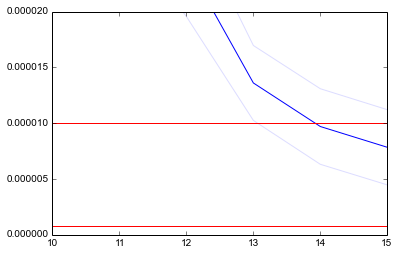

In [2]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.0000,0.00002)

# looks like epoch 14 is good for 0.00001

(10, 21)
last 1.40721053237e-05 threshold 2e-05


(1e-05, 3e-05)

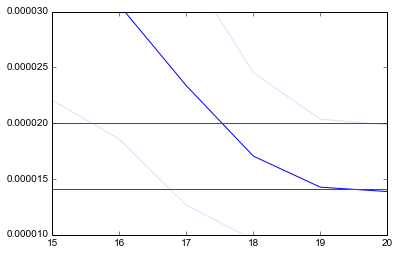

In [7]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00002
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(15, 20)
ylim(0.00001,0.00003)

# looks like epoch 18 is good for 0.00001

vloss shape (50, 15)
scores shape (50,)
[ 0.          0.          0.          0.          0.69791667  0.          0.
  0.          0.          0.94791667  0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          1.          0.          0.
  0.          0.48958333  0.          0.          0.          0.          0.
  0.97916667  0.          0.          0.          0.          0.          0.
  0.        ]


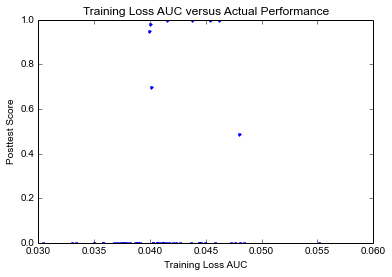

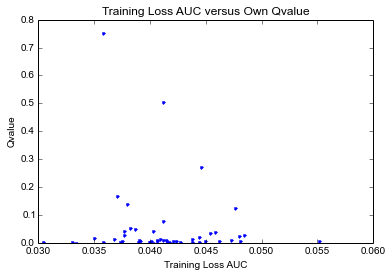

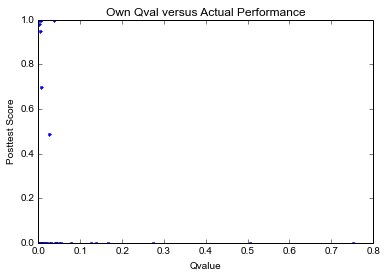

In [10]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
#six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

vloss shape (50, 19)
scores shape (50,)
[ 0.          0.97916667  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.          0.
  0.          0.          0.01041667  0.          0.          0.17708333
  0.          0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          1.          0.          0.
  0.          0.        ]
[  2.23765666e-01   1.12568809e-02   2.02305736e-01   8.88016321e-04
   1.95501071e-03   1.19468987e-03   6.84202540e-03   2.14433014e-01
   1.75376245e-02   1.18412470e-03   1.09504407e-04   3.63666502e-04
   1.77648196e-02   1.30198914e-03   2.51460382e-03   3.67847588e-03
   1.40250611e-02   8.81600085e-01   4.15984558e-05   3.40506373e-04
   1.75204686e-03   1.12140612e-01   2.73817874e-02   

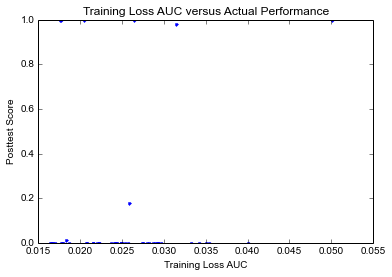

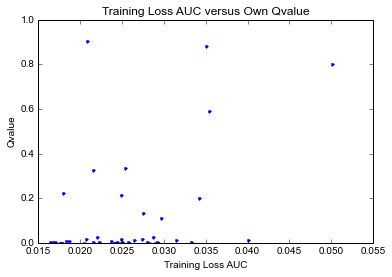

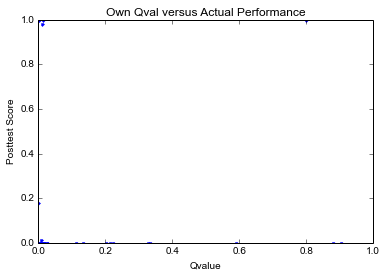

In [11]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelgrusimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

# Mid-size models

(10, 21)
last 2.44149599946e-08 threshold 1e-05


(0.0, 2e-05)

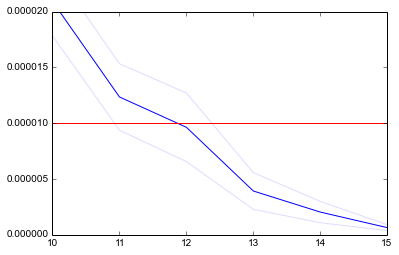

In [19]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.00000,0.00002)

# looks like epoch 12 is good for 0.00001

(10, 21)
last 2.22655664888e-09 threshold 1e-05


(0.0, 2e-05)

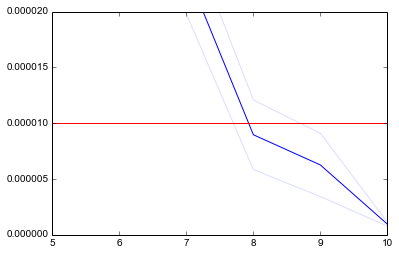

In [20]:
'''
Single GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.00000,0.00002)

# looks like epoch 8 is good for 0.00001

vloss shape (20, 13)
scores shape (20,)
[ 0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.
  0.  0.]
[ 0.00124685  0.00616346  0.0007838   0.00565741  0.00083692  0.02059899
  0.00126828  0.00125655  0.00208255  0.00432578  0.00247904  0.00037788
  0.00194578  0.00481135  0.0002623   0.00209805  0.00381079  0.00830598
  0.00825595  0.00314597]


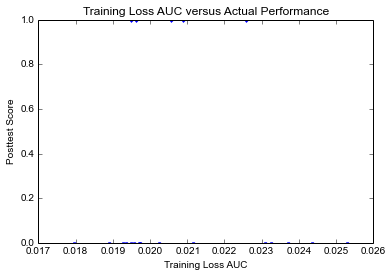

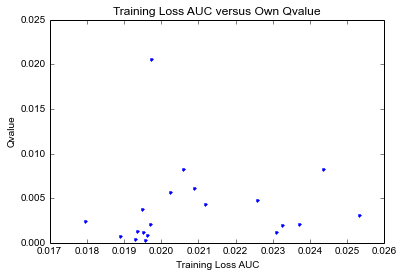

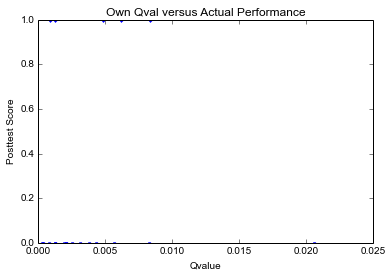

In [22]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelsimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

vloss shape (20, 9)
scores shape (20,)
[ 0.          0.          0.          1.          0.95833333  0.          0.
  0.          0.04166667  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
[ 0.1093456   0.02884056  0.01704163  0.04735987  0.03886025  0.01901123
  0.00332704  0.00418428  0.00451239  0.0287561   0.05356895  0.00439729
  0.00619585  0.05504957  0.4692166   0.00888737  0.00659951  0.00441114
  0.00933231  0.0336731 ]


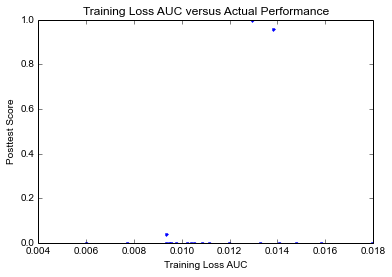

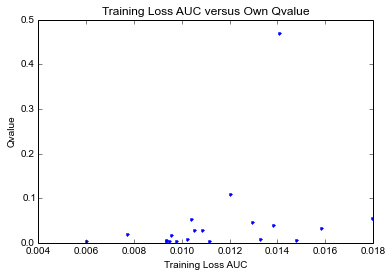

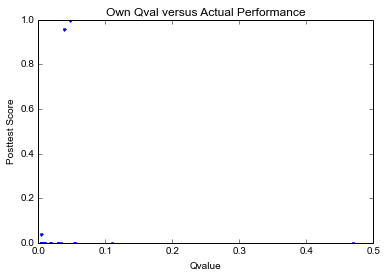

In [23]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Single GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelgrusimple_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

# Double LSTM small and mid

(10, 21)
last 0.00115071435609 threshold 0.00116


(0.00115, 0.00117)

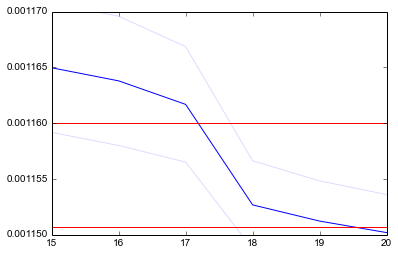

In [28]:
'''
Double LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00116
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(15, 20)
ylim(0.00115,0.00117)

# looks like epoch 18 is kind of good for 0.00001

(10, 21)
last 0.00115209533656 threshold 0.00116


(0.00115, 0.00117)

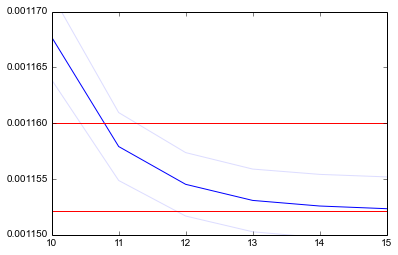

In [30]:
'''
Double LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runA.npz')

vloss = data11['vloss']

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00116
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.00115,0.00117)

# looks like epoch 11 is good for 0.00001

vloss shape (20, 19)
scores shape (20,)
[ 0.       0.       0.09375  0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       1.       1.       1.
  0.       0.     ]
[ 0.00102472  0.01989872  0.24067266  0.00543391  0.00412199  0.01015231
  0.00259526  0.00394492  0.04202833  0.00124165  0.00157792  0.03009439
  0.70958813  0.06127161  0.00772941  0.7894189   0.72643985  0.36502507
  0.00635362  0.27789079]


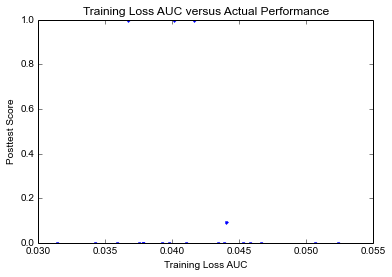

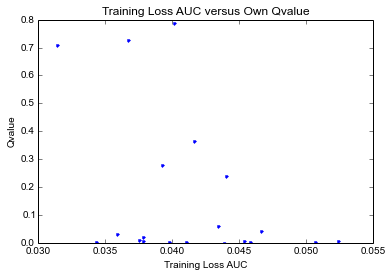

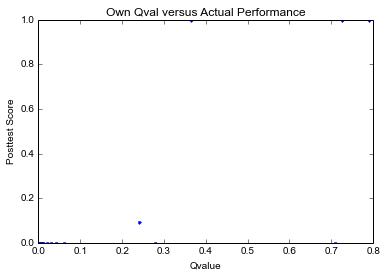

In [2]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Double LSTM small
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

vloss shape (20, 12)
scores shape (20,)
[ 0.          0.          0.78125     0.          0.          0.          0.
  0.          1.          0.02083333  0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.        ]
[ 0.00157823  0.00887153  0.01121692  0.00285873  0.00110217  0.00450261
  0.01038289  0.00043538  0.0010537   0.00051461  0.00209743  0.00411649
  0.00379744  0.01149898  0.00703243  0.01909315  0.00431918  0.01050541
  0.00663018  0.00911444]


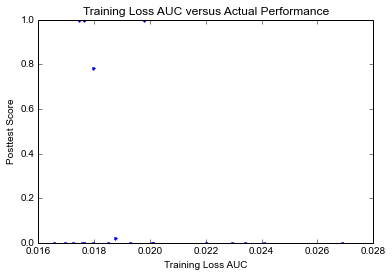

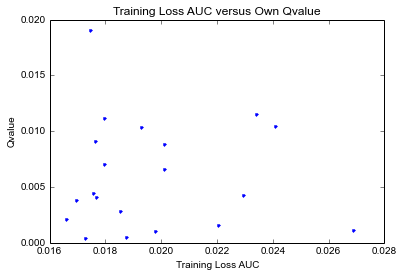

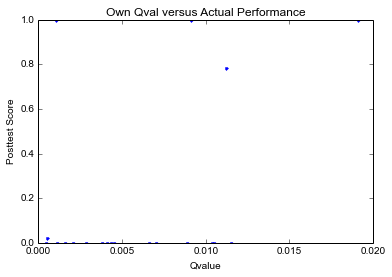

In [3]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Double LSTM mid
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_model_mid-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
qvals = data21['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)
six.print_(qvals)

graph_trainauc_score(vloss, scores)
graph_trainauc_qval(vloss, qvals)
graph_qval_score(qvals, scores)

# Further Experiments with Single LSTM small

vloss shape (50, 15)
scores shape (50,)
 0: score 0.00 realq 0.0063 | scoresemi 0.75 realqsemi 2.9912
 1: score 0.00 realq 0.0092 | scoresemi 1.00 realqsemi 2.9975
 2: score 0.00 realq 0.0064 | scoresemi 0.75 realqsemi 2.9777
 3: score 0.00 realq 0.0048 | scoresemi 0.75 realqsemi 2.9909
 4: score 0.75 realq 0.0058 | scoresemi 0.75 realqsemi 2.9907
 5: score 0.00 realq 0.0027 | scoresemi 0.75 realqsemi 2.9797
 6: score 0.00 realq 0.0025 | scoresemi 0.75 realqsemi 2.9315
 7: score 0.00 realq 0.0001 | scoresemi 0.98 realqsemi 2.9857
 8: score 0.00 realq 0.0395 | scoresemi 0.75 realqsemi 2.9849
 9: score 1.00 realq 0.0045 | scoresemi 0.75 realqsemi 2.9946
10: score 0.00 realq 0.0877 | scoresemi 0.75 realqsemi 2.9712
11: score 0.00 realq 0.0113 | scoresemi 0.75 realqsemi 2.9536
12: score 0.00 realq 0.0050 | scoresemi 0.75 realqsemi 2.9611
13: score 0.00 realq 0.0044 | scoresemi 0.75 realqsemi 2.9697
14: score 0.00 realq 0.0131 | scoresemi 0.75 realqsemi 2.9972
15: score 0.00 realq 0.5056 | 

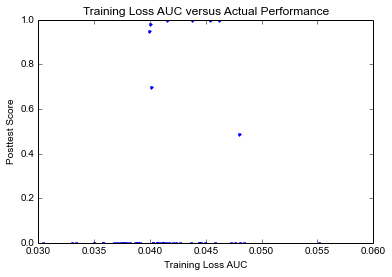

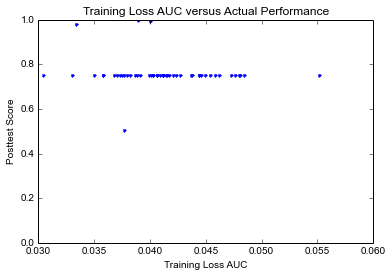

In [6]:
'''
Analyzing results of student2 with 4 skills, with training length 5 and testing length 6.
Single LSTM small
Trying to see if we can pick the right model.
'''

data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')
data31 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype1-rollouts3000-trajectories100-real1-runB.npz')
data41 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/initialq-rtype2-rollouts100000-runB.npz')
data51 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype2-rollouts20000-trajectories10-real1-runB.npz')
data61 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2a-n100000-l5-random.pickle/mcts-rtype1-rollouts20000-trajectories10-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
realq = data21['qvals'][:,0]
scoressemi = data31['scores'][:,0] / 4.0
realqsemi = data31['qvals'][:,0]
initialq = data41['qvals'][:,0]

scores2 = data51['scores'][:,0]
realq2 = data51['qvals'][:,0]

scoressemi2 = data61['scores'][:,0] / 4.0
realqsemi2 = data61['qvals'][:,0]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss[:,-1])
six.print_('scores shape {}'.format(scores.shape))
for i in six.moves.range(scores.shape[0]):
    six.print_('{:2d}: score {:.2f} realq {:.4f} | scoresemi {:.2f} realqsemi {:.4f}'.format(
        i, scores2[i], realq2[i], scoressemi[i], realqsemi[i]))

graph_trainauc_score(vloss, scores)
graph_trainauc_score(vloss, scoressemi)

# Now try single LSTM with dropout regularization